# INTRODUCTION

# BUSINESS PROBLEM

# IMPORTS

In [1]:
# core operational packeges
import os
import warnings
# data manupulation
import pandas as pd
pd.set_option('display.max_columns',0)
import numpy as np

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [2]:
# Machine Learning
from sklearn.model_selection import train_test_split

In [3]:
# custom functions loader
%load_ext autoreload
%autoreload 2
import functions as fun

# notebook styling packages
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')
## to reset to default theme
# jtplot.reset()

# OBTAIN

# SCRUB & EXPLORE

In [4]:
# loading data
df = pd.read_csv('./data/garments_worker_productivity.csv')

In [5]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [7]:
fun.check_NaN(df)

,name,is_null,not_null
0,date,0,1197
1,quarter,0,1197
2,department,0,1197
3,day,0,1197
4,team,0,1197
5,targeted_productivity,0,1197
6,smv,0,1197
7,wip,506,691
8,over_time,0,1197
9,incentive,0,1197


In [8]:
fun.check_duplicates(df, verbose=False)

,name,duplicated,not_duplicated
0,date,1138,59
1,quarter,1192,5
2,department,1194,3
3,day,1191,6
4,team,1185,12
5,targeted_productivity,1188,9
6,smv,1127,70
7,wip,648,549
8,over_time,1054,143
9,incentive,1149,48


In [9]:
df.describe().transpose().style.format("{0:,.0f}")

,count,mean,std,min,25%,50%,75%,max
team,"1,197",6,3,1,3,6,9,12
targeted_productivity,"1,197",1,0,0,1,1,1,1
smv,"1,197",15,11,3,4,15,24,55
wip,691,"1,190","1,837",7,774,"1,039","1,252","23,122"
over_time,"1,197","4,567","3,349",0,"1,440","3,960","6,960","25,920"
incentive,"1,197",38,160,0,0,0,50,"3,600"
idle_time,"1,197",1,13,0,0,0,0,300
idle_men,"1,197",0,3,0,0,0,0,45
no_of_style_change,"1,197",0,0,0,0,0,0,2
no_of_workers,"1,197",35,22,2,9,34,57,89


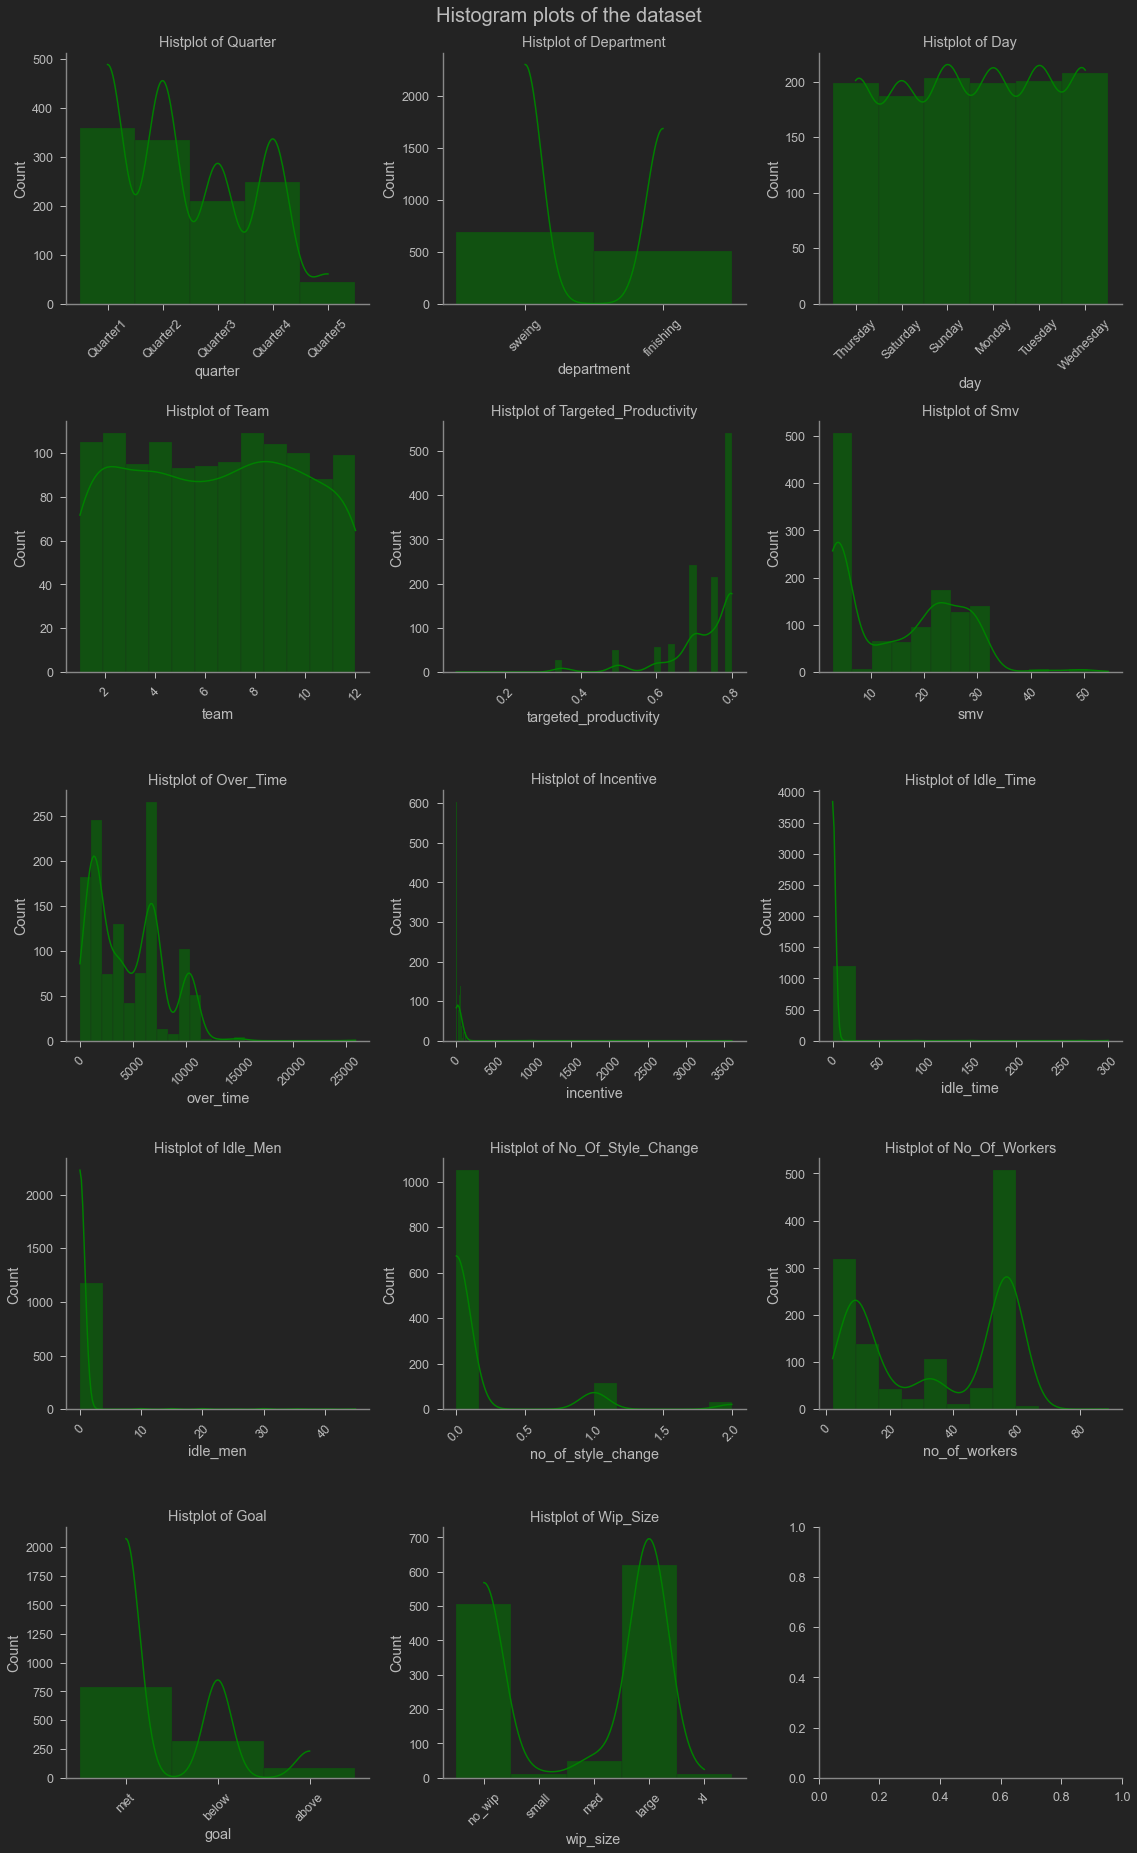

In [18]:
fun.df_distribution(df,color_plot='green')

target

In [11]:
# empty list to hold data
lst = []
for x in zip(df.targeted_productivity, df.actual_productivity):
    # % change in variables
    delta = np.log(x[1] / x[0])
    if delta < 0:
        lst.append('below')
    elif 0 <= delta < .25:
        lst.append('met')
    elif delta >= .25:
        lst.append('above')
    # error hadeler
    else:
        lst.append('?')
df['goal'] = lst

wip

In [12]:
# filling NaN's with 0, meaning no wip for that session
df['wip'] = df['wip'].fillna(0)
# intervals for binning
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 150), 
                                     (150, 500), (500, 2500),
                                     (2500, 1e6)],
                                    closed='left')
# binning
wip_size = pd.cut(df['wip'].tolist(), bins=bins)
# naming categories
wip_size.categories = ['no_wip', 'small', 'med', 'large', 'xl']
# appending to df
df['wip_size'] = wip_size

text cleaning

In [13]:
# cleaning spaces
df['department'] = df['department'].str.strip()
# checking
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

drop

In [14]:
df.drop(columns=['date', 'wip', 'actual_productivity'], inplace=True)

split

In [15]:
X = df.drop(columns='goal').copy()
y = df[['goal']]

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=.25)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((897, 13), (300, 13), (897, 1), (300, 1))

In [17]:
# OHE
# Scaling
# Pipelineing
# dummy model

# logistic regression
# grid search CV
# ensamble methods
# SVM

# MODEL

# INTERPRET

# RECOMMENDATION

# NEXT STEPS

# APPENDIX